In [1]:
import glob
import re
import os
from collections import Counter
import numpy as np
from tqdm import tqdm
import sentencepiece as spm
from matplotlib import pyplot as plt

with open('data/e_coli_genome.txt','r') as f:
    e = f.read()
e = e.split()
e = ''.join([i for i in e if len(i)==10 and re.sub('[acgt]','',i)==''])
print('genome size:',len(e))

genome size: 4641650


In [2]:
sp = spm.SentencePieceProcessor(
    model_file='sentencepiece/ecoli_8800.model')

toks = sp.encode_as_pieces(e)

tokcounts1 = Counter(toks)

sp = spm.SentencePieceProcessor(
    model_file='sentencepiece/ecoli_7000.model')

toks = sp.encode_as_pieces(e)

tokcounts2 = Counter(toks)

slope 1.0692479765127638
intercept -0.57497828669465
r_value 0.9730363016998703
p_value 0.0
std_err 0.0030302730336668844


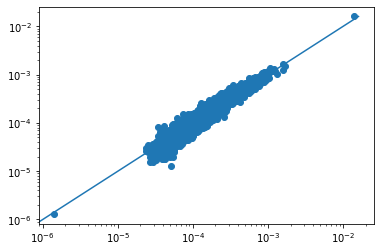

In [3]:
from matplotlib import pyplot as plt
from scipy import stats

toks = list(set(tokcounts1)&set(tokcounts2))

C1 = np.array([tokcounts1[t] for t in toks])
C2 = np.array([tokcounts2[t] for t in toks])
C1 = C1/sum(C1)
C2 = C2/sum(C2)
plt.scatter(C1,C2)
m = max(max(C1),max(C2))
plt.plot([0,m],[0,m])
plt.xscale('log')
plt.yscale('log')


slope, intercept, r_value, p_value, std_err = stats.linregress(
                            -np.log(C1),-np.log(C2))
ns = 'slope, intercept, r_value, p_value, std_err'.split(', ')
for n,x in zip(ns, [slope, intercept, r_value, p_value, std_err]):
    print(n,x)